In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from djinn import djinn
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# For the boston housing data you can expect final 
# test MSE~10-20, Mean Abs Err~3-4, Exp.Var.~0.8+
# when using get_hyperparameters() 


#Load the data, split into training/testing groups
d=sklearn.datasets.load_boston()
X=d.data
Y=d.target
Y=np.column_stack((Y,0.5*Y))   # make two columns of outputs
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) 

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [ ]:
print("Create DJINN model with multiple outputs")
modelname="multireg_djinn_test"    # name the model
ntrees=1                        # number of trees = number of neural nets in ensemble
maxdepth=4                      # max depth of tree -- optimize this for each data set
dropout_keep=1.0                # dropout typically set to 1 for non-Bayesian models

# initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)

# find optimal settings
optimal=model.get_hyperparameters(x_train,y_train)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=np.min((300,optimal['epochs']))

# train the model with these settings
model.train(x_train,y_train, epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname)

m=model.predict(x_test)

Create DJINN model with multiple outputs
Finding optimal hyper-parameters...
Determining learning rate...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Determining number of epochs needed...
Optimal learning rate:  0.007864604554601543
Optimal # epochs:  410
Optimal batch size:  21
Epoch: 0001 cost= 0.066016211
Epoch: 0002 cost= 0.038348682
Epoch: 0003 cost= 0.027220976
Epoch: 0004 cost= 0.019021135
Epoch: 0005 cost= 0.015652650
Epoch: 0006 cost= 0.013708620
Epoch: 0007 cost= 0.008272311
Epoch: 0008 cost= 0.009819010
Epoch: 0009 cost= 0.009282579
Epoch: 0010 cost= 0.013093925
Epoch: 0011 cost= 0.007458518
Epoch: 0012 cost= 0.011238996
Epoch: 0013 cost= 0.009131729
Epoch: 0014 cost= 0.010463746
Epoch: 0015 cost= 0.008801898
Epoch: 0016 cost= 0.010265923
Epoch: 0017 cost= 0.007350856
Epoch: 0018 cost= 0.006718974
Epoch: 0019 cost= 0.009215436
Epoch: 0020 cost= 0.011632575
Epoch: 0021 cost= 0.011383672
Epoch: 0022 cost= 

In [ ]:
# evaluate results
for i in [0,1]:
    mse=sklearn.metrics.mean_squared_error(y_test[:,i],m[:,i])
    mabs=sklearn.metrics.mean_absolute_error(y_test[:,i],m[:,i])
    exvar=sklearn.metrics.explained_variance_score(y_test[:,i],m[:,i])   
    print('MSE',mse)
    print('M Abs Err',mabs)
    print('Expl. Var.',exvar)


# close model 
model.close_model()

MSE 9.62002216085294
M Abs Err 2.101447011910233
Expl. Var. 0.8944035298847637
MSE 2.404993580205616
M Abs Err 1.0501691500345867
Expl. Var. 0.894530270712597


In [ ]:
print("Reload model and continue training for 50 epochs")

# reload model and continue training for 50 more epochs
model2=djinn.load(model_name="multireg_djinn_test")

model2.continue_training(x_train, y_train, 50, learnrate, batchsize)

m2=model2.predict(x_test)

# evaluate results
mse2=sklearn.metrics.mean_squared_error(y_test,m2)
mabs2=sklearn.metrics.mean_absolute_error(y_test,m2)
exvar2=sklearn.metrics.explained_variance_score(y_test,m2)   
print('MSE',mse2)
print('M Abs Err',mabs2)
print('Expl. Var.',exvar2)

Reload model and continue training for 50 epochs
INFO:tensorflow:Restoring parameters from ./multireg_djinn_test_tree0.ckpt
Model 0 restored
INFO:tensorflow:Restoring parameters from ./multireg_djinn_test_tree0.ckpt
Model 0 restored
Epoch: 0001 cost= 0.002364386
Epoch: 0002 cost= 0.002339740
Epoch: 0003 cost= 0.002481697
Epoch: 0004 cost= 0.002114191
Epoch: 0005 cost= 0.002285002
Epoch: 0006 cost= 0.001936253
Epoch: 0007 cost= 0.002054101
Epoch: 0008 cost= 0.001705925
Epoch: 0009 cost= 0.001824887
Epoch: 0010 cost= 0.001742644
Epoch: 0011 cost= 0.002020735
Epoch: 0012 cost= 0.002583684
Epoch: 0013 cost= 0.001763619
Epoch: 0014 cost= 0.001697042
Epoch: 0015 cost= 0.001789005
Epoch: 0016 cost= 0.002213922
Epoch: 0017 cost= 0.002275724
Epoch: 0018 cost= 0.001986016
Epoch: 0019 cost= 0.002203313
Epoch: 0020 cost= 0.001595798
Epoch: 0021 cost= 0.001259696
Epoch: 0022 cost= 0.001443003
Epoch: 0023 cost= 0.001475014
Epoch: 0024 cost= 0.001461708
Epoch: 0025 cost= 0.001560563
Epoch: 0026 cost=

In [ ]:
print ("Create Bayesian-DJINN model with multiple outputs")
modelname="multireg_bdjinn_test"  #name the model 
ntrees=3                       # make ensemble of (3) models
dropout_keep=0.95              # turn on dropout for error bars

# initilaize model and get hyper-parameters
bmodel=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
optimal=bmodel.get_hyperparameters(x_train,y_train)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# train the model with these settings
bmodel.train(x_train,y_train,epochs=epochs,learn_rate=learnrate,batch_size=batchsize, 
             display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname)

# evaluate 
niters=50
bl,bm,bu,results=bmodel.bayesian_predict(x_test,n_iters=niters)

for i in [0,1]:
    mse=sklearn.metrics.mean_squared_error(y_test[:,i],m[:,i])
    mabs=sklearn.metrics.mean_absolute_error(y_test[:,i],m[:,i])
    exvar=sklearn.metrics.explained_variance_score(y_test[:,i],m[:,i])   
    print('MSE',mse)
    print('M Abs Err',mabs)
    print('Expl. Var.',exvar)

Create Bayesian-DJINN model with multiple outputs
Finding optimal hyper-parameters...
Determining learning rate...
Determining number of epochs needed...
Optimal learning rate:  0.007329895002126273
Optimal # epochs:  210
Optimal batch size:  21
Epoch: 0001 cost= 0.050861573
Epoch: 0002 cost= 0.026427785
Epoch: 0003 cost= 0.023462509
Epoch: 0004 cost= 0.015094962
Epoch: 0005 cost= 0.016906928
Epoch: 0006 cost= 0.011761264
Epoch: 0007 cost= 0.011839748
Epoch: 0008 cost= 0.010550514
Epoch: 0009 cost= 0.012381198
Epoch: 0010 cost= 0.011280682
Epoch: 0011 cost= 0.009583435
Epoch: 0012 cost= 0.010426650
Epoch: 0013 cost= 0.007343077
Epoch: 0014 cost= 0.013080288
Epoch: 0015 cost= 0.008448573
Epoch: 0016 cost= 0.009288382
Epoch: 0017 cost= 0.007260575
Epoch: 0018 cost= 0.009139872
Epoch: 0019 cost= 0.009339802
Epoch: 0020 cost= 0.008758512
Epoch: 0021 cost= 0.009341729
Epoch: 0022 cost= 0.007247039
Epoch: 0023 cost= 0.007676812
Epoch: 0024 cost= 0.011794898
Epoch: 0025 cost= 0.009447866
Epoc

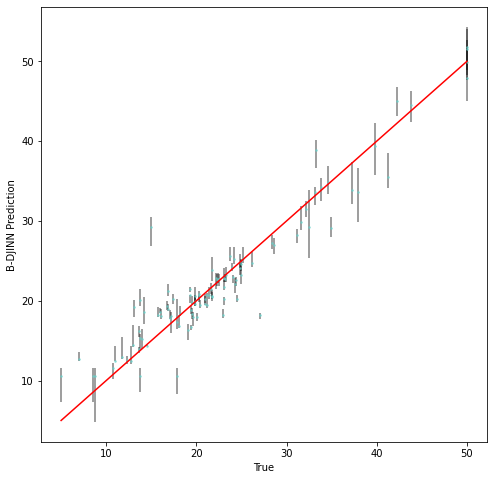

In [ ]:
#Make a pretty plot
g=np.linspace(np.min(y_test[:,0]),np.max(y_test[:,0]),10)    
fig, axs = plt.subplots(1,1, figsize=(8,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .15, wspace=.1)
sc=axs.scatter(y_test[:,0], bm[:,0], linewidth=0,s=6, 
                  alpha=0.8, c='#68d1ca')
a,b,c=axs.errorbar(y_test[:,0], bm[:,0], yerr=[bm[:,0]-bl[:,0],bu[:,0]-bm[:,0]], marker='',ls='',zorder=0, 
                   alpha=0.5, ecolor='black')
axs.set_xlabel("True")
axs.set_ylabel("B-DJINN Prediction")    
axs.plot(g,g,color='red');

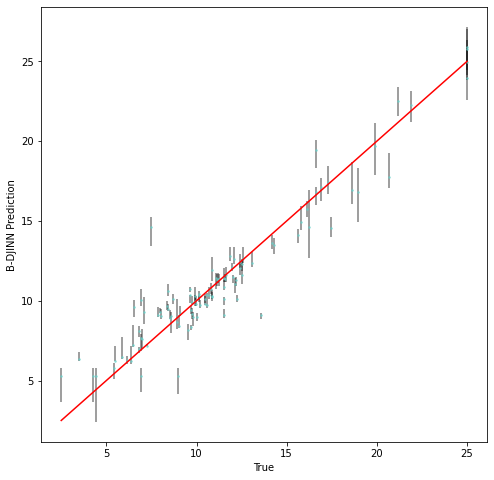

test collect tree predictions fn
(150, 102, 2)


In [ ]:
#Make a pretty plot
g=np.linspace(np.min(y_test[:,1]),np.max(y_test[:,1]),10)    
fig, axs = plt.subplots(1,1, figsize=(8,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .15, wspace=.1)
sc=axs.scatter(y_test[:,1], bm[:,1], linewidth=0,s=6, 
                  alpha=0.8, c='#68d1ca')
a,b,c=axs.errorbar(y_test[:,1], bm[:,1], yerr=[bm[:,1]-bl[:,1],bu[:,1]-bm[:,1]], marker='',ls='',zorder=0, 
                   alpha=0.5, ecolor='black')
axs.set_xlabel("True")
axs.set_ylabel("B-DJINN Prediction")    
axs.plot(g,g,color='red')
plt.show()

print("test collect tree predictions fn")
p=bmodel.collect_tree_predictions(results['predictions'])
print(p.shape)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=de072003-a9db-4342-8067-19a4b45feff1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>